# Zweifeldträger{#sec-zweifeldtraeger_anhang}

In diesem Kapitel werden die detaillierten Berechnungen zum Vorlesungsbeispiel des Zweifeldträgers aus @jager_stahlbeton_2009 aufgezeigt. Das Beispiel verfolgt das Ziel, das Last-Verformungs-Verhalten für zwei Betonstähle mit unterschiedlichen Duktilitätsklassen aufzuzeigen. Die Aufgabenstellung ist in @sec-zweifeldtraeger aufgezeigt. 

Die Berechnung startet mit einem allgemeinen Teil, welcher Betonstahl unabhängig ist. Danach folgt die analytische und numerische Lösung für das System mit dem Betonstahl B500A. Abschliessend folgt die Berechnung für den Betonstahl B500C.

Um einen Überblick über die analytische Lösung zu gewähren, wird das Vorgehen zuerst beschrieben. 

Betrachtet man das System unter steigender Belastung, so ist naheliegend, dass sich über dem Mittelauflager zuerst ein plastisches Gelenk bildet. Falls genügend Rotationsvermögen vorhanden ist, bildet sich in Feldmitte ebenfalls ein plastisches Gelenk.

Eine zentrale Grösse ist folglich das Rotationsvermögen der plastischen Gelenke. Um das Rotationsvermögen abzuschätzen wird das Zugglied analysiert. Für den Zustand des Fliessens der Bewehrung und den Zustand beim Erreichen der Zugfestigkeit wird eine mittlere Dehnung über das Zugglied ermittelt. Mit dieser Dehnungsdifferenz lässt sich das Rotationsvermögen bestimmen.

Gefolgt wird die Grenzzustandbetrachtung von der eigentlichen Systemanalyse. Dabei wird für jeden Zustand die erforderliche Belastung $q$ ermittelt. Die zugehörige Verformung wird unter der Berücksichtigung einer konstanten gerissenen Biegesteifigkeit bestimmt.


## Allgemeines

### Annahmen

- Zwei unterschiedliche Stähle
- konstant gerissene Biegesteifigkeit entlang der Stabachse

### Parameter



In [1]:
from packages import *

#### Bewehrung

Die folgenden Parameter der Biegebewehrung finden Einzug in die Berechnung.

In [2]:
# Längsbewehrung in X-Richtung gerichtet
diam_x = 14 * un.mm

# Teilung der Längsbewehrung
s_x = 200 * un.mm

# Längsbewehrung in Y-Richtung gerichtet
diam_y = 12 * un.mm

# Teilung der Längsbewehrung
s_y = 200 * un.mm

put_out(symbolic=False)

$$
\begin{aligned}
\oslash_{x}& = 14 \ \mathrm{mm} \quad & s_{x}& = 200 \ \mathrm{mm} \quad & \oslash_{y}& = 12 \ \mathrm{mm} \\ 
s_{y}& = 200 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

Der Querschnitt der Längsbewehrung für den Meterstreifen beträgt dabei:

In [3]:
# Querschnittsfläche der Längsbewehrung, pro Längeneinheit
a_s = (diam_x**2 / 4 * np.pi / s_x).to(un.mm**2 / un.m)

put_out(symbolic=True)

$$
\begin{aligned}
a_{s}& = \frac{\pi \cdot \oslash_{x}^{2}}{4 \cdot s_{x}} = 769.69 \ \frac{\mathrm{mm}^{2}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

#### Geometrie

Die verwendeten Parameter der Geoemtrie sind hier gezeigt. Dabei ist die Überdeckung, Plattenstärke, Streifenbreite und Balkenlänge beschrieben.

In [4]:
# Betonüberdeckung
c = 20 * un.mm

# Plattenstärke
h = 300 * un.mm

# Streifenbreite
b_w = 1 * un.m

# Balkenlänge
l = 8 * un.m


put_out()

$$
\begin{aligned}
c& = 20 \ \mathrm{mm} \quad & h& = 300 \ \mathrm{mm} \quad & b_{w}& = 1 \ \mathrm{m} \\ 
l& = 8 \ \mathrm{m} \quad &  \quad &  
 \end{aligned}
$$

Daraus lässt sich die statische Höhe der Längsbeweherung in $X$-Richtung bestimmen:

In [5]:
# Statische Höhe in der Bewehrung in X-Richtung
d_x = h - c - diam_y - 1 / 2 * diam_x

put_out(symbolic=True, evaluate=True)

$$
\begin{aligned}
d_{x}& = - \frac{\oslash_{x}}{2} - \oslash_{y} - c + h = 261.0 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

#### Beton

Der Beton wird beschrieben mit der Zylinderdruckfestigkeit, Elastizitätsmodul und die Bruchstauchung:

In [6]:
# Zylinderdruckfestigkeit vorausgesetzt
f_cc = 30 * un.N / un.mm**2

# Elastizitätsmodul des Betons
E_c = 29.3 * un.kN / un.mm**2

# Bruchstauchung Erfahrungswert
eps_cu = 5 * un.permille

put_out()


$$
\begin{aligned}
f_{cc}& = 30.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{c}& = 29.3 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \quad & \varepsilon_{cu}& = 5 \ \mathrm{‰} \end{aligned}
$$

Daraus wird mit empirischen Ansätzen eine Bauteilfestigkeit und eine Betonzugfestigkeit bestimmt.

In [7]:
# Betonzugfestigkeit, nicht einheitentreu
f_ct = (0.3 * f_cc.m ** (2 / 3)) * un.N / un.mm**2

# Effektive Betondruckfestigkeit, nicht einheitentreu
f_c = (2.5 * f_cc.m ** (2 / 3)) * un.N / un.mm**2


put_out(symbolic=True, evaluate=False, rows=1)

$$
\begin{aligned}
f_{ct}& = 0.3 \cdot f_{cc}^{\frac{2}{3}} = 2.9 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
f_{c}& = 2.5 \cdot f_{cc}^{\frac{2}{3}} = 24.14 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

### Zugversteifung

Vor der eigentlichen Analyse des Systems werden die Parameter für das Zuggurtmodell bestimmt. Das Zuggurtmodell liefert einen analytischen Ansatz die Zugversteifung, sprich das Mitwirken des Beton zwischen den Rissen, zu berücksichtigen. Dazu wird eine Schubspannungs-Schlupf-Beziehung zwischen Beton und Betonstahl definiert.

In [8]:
# Verbundschubspannung vor dem Fliessen
tau_b0 = 2 * f_ct

# Verbundschubspannung vor dem Fliessen
tau_b1 = f_ct

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\tau_{b0}& = 2 \cdot f_{ct} = 5.79 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\tau_{b1}& = f_{ct} = 2.9 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

In [9]:
fig_tau_delta, ax_tau_delta = plt.subplots()

delta_array = np.array([0,0.0001,5,5.0001,10, 10.0001])
tau_array = np.array([0,tau_b0.m, tau_b0.m, tau_b1.m, tau_b1.m, 0])
ax_tau_delta.plot(delta_array, tau_array, color='black')

# Add labels and show the plot
ax_tau_delta.set_ylabel("$\\tau$ [N/mm$^2$]")
ax_tau_delta.set_xlabel("$\delta$")
ax_tau_delta.set_xticks([])# Save the plot to the specified file
plt.savefig("imgs/jag_tau_delta.svg")
plt.close()

![Schubspannungs-Schlupf-Beziehung als Basis für das Zuggurtmodell](../imgs/jag_tau_delta.svg){#fig-jag_tau_delta}

Mit der Schubspannungs-Schlupf-Beziehung lässt sich die Betonstahlspannung innerhalb des Risselements reduzieren. Die Spannungsverläufe sind in der @fig-jag_risselement gezeigt.

![Risselement zur Anwendung des Zuggurtmodells](../imgs/jag_risselement.svg){#fig-jag_risselement}

Die Länge des Risselements kann anhand des Bewehrungsgehalts abgeschätzt werden.

In [10]:
# Abschätzung der mitwirkenden Höhe der Betonzugzone
h_eff = 2 * (h - d_x)

# Geometrischer Bewehrungsgehalt
rho = (a_s / h_eff).to(un.percent)

# maximaler Rissabstand
s_r0 = (diam_x * (1 - rho) / (4 * rho)).to(un.mm)

# minimaler Rissabstand
s_rl = 1 / 2 * s_r0



put_out(symbolic=True, rows=1)

$$
\begin{aligned}
h_{eff}& = 2 \cdot \left(- d_{x} + h\right) = 78.0 \ \mathrm{mm} \\ 
\rho& = \frac{a_{s}}{h_{eff}} = 0.99 \ \mathrm{\%} \\ 
s_{r0}& = \frac{\oslash_{x} \cdot \left(1 - \rho\right)}{4 \cdot \rho} = 351.19 \ \mathrm{mm} \\ 
s_{rl}& = 1 \cdot \frac{1}{2} \cdot s_{r0} = 175.59 \ \mathrm{mm} \end{aligned}
$$

Es ist naheliegend der Rissabstand entsprechend der Stabteilung in $Y$-Richtung zu wählen, da die Bewehrung eine Betonschwächung darstellt.

In [11]:

s_r = 200 * un.mm

put_out()

$$
\begin{aligned}
s_{r}& = 200 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

In [12]:
# Bestimmung der mittleren Stahldehnung

def eps_sm_bilinear(
    E_s, E_sh, s_r, tau_b0, tau_b1, diam, sigma_sr, f_sy, f_su, epsilon_sy
):
    # display(Markdown("Berechnungen nach @marti_tragverhalten_1999 Seite 156"))
    if sigma_sr <= f_sy:
        # display(Markdown("Gleichung 1"))
        return sigma_sr / E_s - tau_b0 * s_r / (E_s * diam)

    if f_sy <= sigma_sr <= (f_sy + (2 * tau_b1 * s_r) / diam):
        # display(Markdown("Gleichung 2"))
        return (
            (sigma_sr - f_sy) ** 2
            * diam
            / (4 * E_sh * tau_b1 * s_r)
            * (1 - E_sh * tau_b0 / (E_s * tau_b1))
            + (sigma_sr - f_sy) / E_s * tau_b0 / tau_b1
            + (epsilon_sy - tau_b0 * s_r / (E_s * diam))
        )

    if (f_sy + 2 * tau_b1 * s_r / diam) <= sigma_sr <= f_su:
        # display(Markdown("Gleichung 3"))
        return (sigma_sr - f_sy) / E_sh + (epsilon_sy - tau_b1 * s_r / (E_sh * diam))
    



## Kaltverformter Betonstahl - B500A

### Eigenschaften des Betonstahls

Allgemein werden die Eigenschaften für den Betonstahl B500A mit einem Suffix $A$ gekennzeichnet.


In [13]:
# Fliessgrenze
f_sy_com_A = 570 * un.N / un.mm**2

# Zugfestigkeit
f_su_com_A = 600 * un.N / un.mm**2

# Fliessdehnung
eps_sy_com_A = 2.78 * un.permille

# Bruchdehnung
eps_su_com_A = 25 * un.permille

# Elastizitätsmodul
E_s_com_A = 205 * un.kN / un.mm**2

# Verfestigungsmodul
E_sh_com_A = 1350 * un.N / un.mm**2

put_out()

$$
\begin{aligned}
f_{sy , A}& = 570.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{su , A}& = 600.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & \varepsilon_{sy , A}& = 2.78 \ \mathrm{‰} \\ 
\varepsilon_{su , A}& = 25 \ \mathrm{‰} \quad & E_{s , A}& = 205.0 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \quad & E_{sh , A}& = 1350.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

In [14]:
# | echo: false

stress_b500a_array = np.array([0, f_sy_com_A.m, f_su_com_A.m]) * un.MPa
strain_b500a_array = np.array([0, eps_sy_com_A, eps_su_com_A])

fig_b500a, ax_b500a = plt.subplots()
ax_b500a.plot(strain_b500a_array, stress_b500a_array.to(un.MPa).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_b500a, stress_b500a_array.m)

# Set axis labels
ax_b500a.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_b500a.set_xlabel(r"$\varepsilon_s$ [-]")

# Set limits
ax_b500a.set_xlim(xmax=135 / 1000)
ax_b500a.set_ylim(ymax=750)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/jag_stress_strain_b500a.svg")
plt.close()

![Spannungs-Dehnungs-Beziehung des Betonstahls B500A](../imgs/jag_stress_strain_b500a_bearb.svg){#stress_strain_b500a}

### Linear elastische - gerissene Biegesteifigkeit

Wird fortan für sämtliche Verformungsberechnungen verwendet.
Querschnittsanalyse:

![Querschnittsanalyse Fliessen der Zugbewehrung, Beton völlig elastisch](../imgs/jag_gerissene_steifigkeit_bearb.svg){#fig-jag_gerissene_steifigkeit}


In [15]:
# Wertigkeit der Elastizitätsmodule
n = E_s_com_A / E_c

put_out(symbolic=True)

$$
\begin{aligned}
n& = \frac{E_{s , A}}{E_{c}} = 7.0 \  \quad &  \quad &  
 \end{aligned}
$$

Die Druckzonenhöhe wird mittels dem Gleichgewicht der horizontalen Kräfte ermittelt

In [16]:
# Mittels Sympy (CAS für Python) wird eine analytische Lösung der
# Druckzonenhöhe für den gerissenen Querschnitt ermittelt.

# Summe der horizontalen Kräfte
sum_Fx = sp.sympify("1/2*x*b_w*sigma_c -sigma_s*a_s*b_w")

# Definition der Spannung in Abhängigkeit der Dehnungen
expr_sigma_c = sp.sympify("eps_c * E_c")
expr_sigma_s = sp.sympify("eps_s * n * E_c")

# Die Beziehung zwischen der Stahl- und Betondehnung nach Hook
expr_epsilon_c = sp.sympify("eps_s /(d-x)*x")

# Substitution der Gleichungen
sum_Fx_subs = sum_Fx.subs(
    {
        "sigma_c": expr_sigma_c.subs("eps_c", expr_epsilon_c),
        "sigma_s": expr_sigma_s,
    }
)

# Erstellen einer numerischen Funktion
x_solve = sp.solve(sum_Fx_subs, "x")[1]
x_solve_lambd = sp.lambdify(("a_s", "b_w", "n", "d"), x_solve)

In [17]:
# Druckzonenhöhe mit Parametern substituiert
x_II = x_solve_lambd(a_s, b_w, n, d_x).to(un.mm)

put_out(symbolic=False)

$$
\begin{aligned}
x_{II}& = 47.91 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

Damit lässt sich das Flächenträgheitsmoment bestimmen für den gerissenen Querschnitt:

In [18]:
# Flächenmoment 2. Grades für den Beton
I_cII = (b_w * x_II**3 / 12 + b_w * x_II * (x_II / 2) ** 2).to(un.mm**4)

# Flächenmoment 2. Grades für den Betonstahl
I_sII = (a_s * b_w * n * (d_x - x_II) ** 2).to(un.mm**4)

# Flächenmoment 2. Grades für den gerissenen Querschnitt
I_II = (I_cII + I_sII).to(un.mm**4)

put_out(symbolic=True, rows=1, evaluate=False)

$$
\begin{aligned}
I_{cII}& = \frac{b_{w} \cdot x_{II}^{3}}{12} + b_{w} \cdot x_{II} \cdot \left(\frac{x_{II}}{2}\right)^{2} = 36650532.72 \ \mathrm{mm}^{4} \\ 
I_{sII}& = a_{s} \cdot b_{w} \cdot n \cdot \left(d_{x} - x_{II}\right)^{2} = 244534349.46 \ \mathrm{mm}^{4} \\ 
I_{II}& = I_{cII} + I_{sII} = 281184882.18 \ \mathrm{mm}^{4} \end{aligned}
$$

Abschliessend folgt die gerissene Biegesteifigkeit zu:

In [19]:
# Gerissene Biegesteifigkeit
EI_II_com_A = (E_c * I_II).to(un.kN * un.m**2)

put_out(symbolic=True)

$$
\begin{aligned}
EI_{II , A}& = E_{c} \cdot I_{II} = 8238.72 \ \mathrm{kN} \cdot \mathrm{m}^{2} \quad &  \quad &  
 \end{aligned}
$$

### Hebelarm der inneren Kräfte

Der Hebelarm der inneren Kräfte wird für den gesamten Träger als konstant angenommen.
Dabei wird dem Beton die Zylinderdruckfestigkeit hinterlegt, sowie erreicht der Stahl die Zugfestigkeit. 

![Querschnittsanalyse zur Bestimmung des Hebelarms der inneren Kräfte](../imgs/jag_hebelarm_A.png){#fig-jag_hebelarm_A}

In [20]:
# Druckzonenhöhe für den Biegewiderstand
x_u_com_A = (a_s * b_w * f_su_com_A / (0.85 * f_cc * b_w)).to(un.mm)

# Hebelarm der inneren Kräfte für den Biegewiderstand
z_com_A = d_x - 1 / 2 * 0.85 * x_u_com_A 

# Biegewiderstand
m_u_com_A = (a_s * f_su_com_A * z_com_A).to(un.kNm / un.m)

put_out(symbolic=True, evaluate=False, rows=1)

$$
\begin{aligned}
x_{u , A}& = \frac{a_{s} \cdot b_{w} \cdot f_{su , A}}{0.85 \cdot b_{w} \cdot f_{cc}} = 18.11 \ \mathrm{mm} \\ 
z_{, A}& = d_{x} - 1 \cdot \frac{1}{2} \cdot 0.85 \cdot x_{u , A} = 253.3 \ \mathrm{mm} \\ 
m_{u , A}& = a_{s} \cdot f_{su , A} \cdot z_{, A} = 116.98 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

### Grenzzustände des Zugglieds

Nun werden zwei Grenzzustände des Zugglieds betrachtet. Zum Einen bei Fliessbeginn, zum anderen beim Erreichen der Zugfestigkeit. Dies dient zur Ermittlung der mittleren Stahldehnung beim Erreichen eines Fliessgelenks und einem plastischen Gelenk.

#### Risselement bei Fliessbeginn - Zustand $A1$

Zunächst wird ein Grenzzustand betrachtet, bei dem das Risselement gerade beim Fliessbeginn steht.

In [21]:
# Stahlspannungen
sigma_1_s_com_A1 = f_sy_com_A
sigma_2_s_com_A1 = f_sy_com_A - 4 * tau_b0 * s_r / 2 / diam_x

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\sigma_{1 s , A1}& = f_{sy , A} = 570.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{2 s , A1}& = f_{sy , A} - \frac{4 \cdot s_{r} \cdot \tau_{b0}}{2 \cdot \oslash_{x}} = 404.49 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Die folgenden Dehnungen stellen sich dabei ein:

In [22]:

# Stahldehnungen
eps_1_s_com_A1 = (sigma_1_s_com_A1 / E_s_com_A).to(un.permille)
eps_2_s_com_A1 = (sigma_2_s_com_A1 / E_s_com_A).to(un.permille)

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\varepsilon_{1 s , A1}& = \frac{\sigma_{1 s , A1}}{E_{s , A}} = 2.78 \ \mathrm{‰} \\ 
\varepsilon_{2 s , A1}& = \frac{\sigma_{2 s , A1}}{E_{s , A}} = 1.97 \ \mathrm{‰} \end{aligned}
$$

Dabei stellt sich die folgende mittlere Stahldehnung ein. Berechnungen nach @marti_tragverhalten_1999 Seite 156.

In [23]:
# Mittlere Stahldehnung nach 
eps_m_s_com_A1 = eps_sm_bilinear(E_s_com_A, E_sh_com_A, s_r, tau_b0, tau_b1, diam_x, f_sy_com_A, f_sy_com_A, f_su_com_A, eps_sy_com_A).to(un.permille)

put_out()


$$
\begin{aligned}
\varepsilon_{m s , A1}& = 2.38 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

Das Fliessmoment beträgt dabei:

In [24]:
# Fliessmoment
m_y_com_A = (a_s * f_sy_com_A * z_com_A).to(un.kNm / un.m)

put_out(symbolic=True)

$$
\begin{aligned}
m_{y , A}& = a_{s} \cdot f_{sy , A} \cdot z_{, A} = 111.13 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

In [25]:
# | echo: false


def plot_stress_strain(
    coordinates,
    filename,
    strain_mean=0,
    strain=False,
    stress=True,
):

    # Plot the polygon
    x, y = zip(*coordinates)  # Unzip the coordinates into x and y

    fig, ax = plt.subplots()

    if strain == True:
        stress = False
        y = np.array(y)*1000  # Convert to permille
        xlabel = r"$x$ [mm]"
        permille = '$10^{-3}$'
        ylabel = rf"$\varepsilon$ [{permille}]"
        
        # Append the first point to close the polygon
        x = np.append(x, x[0])
        y = np.append(y, y[0])

        # Plot the coordinates
        ax.plot(x, y, "black")
        ax.fill(x, y, color="darkgray", alpha=0.2)
        ax.axhline(strain_mean, linestyle='--', color = 'black')

    if stress == True:
        xlabel = r"$x$ [mm]"
        ylabel = r"$\sigma$ [N/mm$^2$]"
        
        # Append the first point to close the polygon
        x = np.append(x, x[0])
        y = np.append(y, y[0])

        # Plot the coordinates
        ax.plot(x, y, "black")


    # Add labels and show the plot
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # Save the plot to the specified file
    plt.savefig(filename)
    plt.close()


In [26]:
# | echo: false

coords_a1_stress = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, sigma_2_s_com_A1.m),
    (0, sigma_1_s_com_A1.m),
]

plot_stress_strain(coords_a1_stress, "imgs/jag_stress_a1.svg", stress=True)


coords_a1_strain = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, eps_2_s_com_A1),
    (0, eps_1_s_com_A1),
]

plot_stress_strain(coords_a1_strain, "imgs/jag_strain_a1.svg", strain=True,strain_mean=eps_m_s_com_A1.m)

::: {#fig-jag_zustand_a1 layout-ncol=2}
![Spannungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_stress_a1.svg){#fig-jag_stress_a1}

![Dehnungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_strain_a1.svg){#fig-jag_strain_a1}

Spannungs- und Dehnungsverlauf entlang der Hälfte des Rissabstands für den Zustand $A1$
:::

#### Risselement beim Erreichen der Zugfestigkeit - Zustand $A2$

Innerhalb des Risselements befindet sich der Betonstahl über der Fliessgrenze, sowohl bereichsweise unterhalb der Fliessgrenze. Dies führt zu den folgenden Spannungs- und Dehnungsverteilungen.

Dazu wird zunächst der Bereich bestimmt, in dem die Bewehrung sich im plastischen Bereich befindet innerhalb des Zugglieds:

In [27]:
# Plastischer Bereich
Delta_x_pl_com_A2 = (f_su_com_A - f_sy_com_A) / (4 * tau_b1 / diam_x)

# Elastischer Bereich
Delta_x_el_com_A2 = s_r / 2 - Delta_x_pl_com_A2

put_out(symbolic=True, evaluate=False, rows=1)

$$
\begin{aligned}
\Delta_{x pl , A2}& = \frac{f_{su , A} - f_{sy , A}}{4 \cdot \frac{1}{\oslash_{x}} \cdot \tau_{b1}} = 36.25 \ \mathrm{mm} \\ 
\Delta_{x el , A2}& = - \Delta_{x pl , A2} + \frac{s_{r}}{2} = 63.75 \ \mathrm{mm} \end{aligned}
$$

Die entsprechenden Spannungen und Dehnungen sin die folgenden. Dargestellt sind diese in der @fig-jag_zustand_a2.

In [28]:
# Stahlspannungen
sigma_3_s_com_A2 = f_sy_com_A - 4 * tau_b0 * Delta_x_el_com_A2 / diam_x
sigma_2_s_com_A2 = f_sy_com_A
sigma_1_s_com_A2 = f_sy_com_A + 4 * tau_b1 * Delta_x_pl_com_A2 / diam_x

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\sigma_{3 s , A2}& = - \frac{4 \cdot \Delta_{x el , A2} \cdot \tau_{b0}}{\oslash_{x}} + f_{sy , A} = 464.49 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{2 s , A2}& = f_{sy , A} = 570.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{1 s , A2}& = \frac{4 \cdot \Delta_{x pl , A2} \cdot \tau_{b1}}{\oslash_{x}} + f_{sy , A} = 600.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Die folgenden Dehnungen resultieren daraus:

In [29]:

# Stahldehnung
eps_1_s_com_A2 = eps_su_com_A
eps_2_s_com_A2 = eps_sy_com_A
eps_3_s_com_A2 = (sigma_3_s_com_A2 / E_s_com_A).to(un.permille)

put_out(symbolic=True, rows=1, evaluate=False)

$$
\begin{aligned}
\varepsilon_{1 s , A2}& = \varepsilon_{su , A} = 25 \ \mathrm{‰} \\ 
\varepsilon_{2 s , A2}& = \varepsilon_{sy , A} = 2.78 \ \mathrm{‰} \\ 
\varepsilon_{3 s , A2}& = \frac{\sigma_{3 s , A2}}{E_{s , A}} = 2.27 \ \mathrm{‰} \end{aligned}
$$

Und die mittlere Stahldehnung beträgt dabei:

In [30]:
# Mittlere Stahldehnung
eps_m_s_com_A2 = eps_sm_bilinear(
    E_s_com_A, E_sh_com_A, s_r, tau_b0, tau_b1, diam_x, f_su_com_A, f_sy_com_A, f_su_com_A, eps_sy_com_A
).to(un.permille)

put_out()

$$
\begin{aligned}
\varepsilon_{m s , A2}& = 6.64 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

In [31]:
# | echo: false

coords_A2_stress = [
    (0, 0), 
    (Delta_x_pl_com_A2.m, 0), 
    (s_r.m / 2, 0), 
    (s_r.m / 2, sigma_3_s_com_A2.m), 
    (Delta_x_pl_com_A2.m, sigma_2_s_com_A2.m),
    (0, sigma_1_s_com_A2.m)
    ]

plot_stress_strain(coords_A2_stress, "imgs/jag_stress_a2.svg", stress=True)


coords_Z2_strain = [
    (0, 0),
    (Delta_x_pl_com_A2.m, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, eps_3_s_com_A2),
    (Delta_x_pl_com_A2.m, eps_2_s_com_A2),
    (0, eps_1_s_com_A2),
]

plot_stress_strain(coords_Z2_strain, "imgs/jag_strain_a2.svg", strain=True, strain_mean=eps_m_s_com_A2.m)

::: {#fig-jag_zustand_a2 layout-ncol=2}
![Spannungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_stress_a2.svg){#fig-jag_stress_a2}

![Dehnungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_strain_a2.svg){#fig-jag_strain_a2}

Spannungs- und Dehnungsverlauf entlang der Hälfte des Rissabstands für den Zustand $A2$
:::

#### Zusammenfassung

Zusammenfassend sind die Werte erneut aufgezeigt. Fliessen und Erreichen der Zugfestigkeit:

In [32]:
eps_m_s_com_A1
m_y_com_A
eps_m_s_com_A2
m_u_com_A


put_out(symbolic=False, rows=2)

$$
\begin{aligned}
\varepsilon_{m s , A1}& = 2.38 \ \mathrm{‰} \quad & m_{y , A}& = 111.13 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
\varepsilon_{m s , A2}& = 6.64 \ \mathrm{‰} \quad & m_{u , A}& = 116.98 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

### Systemanalyse 

Nun wird das System analysiert, sprich der Zweifeldträger.

![Definition der plastischen Rotation](../imgs/jag_mechanismus.svg){#fig-jag_mechanismus}


![Definition der plastischen Rotation beim Mittelauflager.Links ein Fliessen beim Mittelauflager führt zu keiner plastischen Rotation, in der Mitte die maximale Rotation zum Erreichen der Traglast, und rechts die effektive Traglast mit begrenzter Plastischer Rotation](../imgs/jag_plast_rot_A.svg){#fig-jag_plast_rot_A}

#### Fliessen des Mittelauflagers - Zustand $SA1$

Zunächst wird sich ein Fliessgelenk beim Mittelauflager ausbilden. Dazu wird nun die zugehörige Streckenlast berechnet und die entsprechende Felddeformation ermittelt.

In [33]:
m_SA1_com_B = m_y_com_A
# Die Streckenlast zum Erreichen des Fliessens bei B
q_SA1 = (8 * m_SA1_com_B*b_w / l**2).to(un.kN/un.m)


# maximale Verformung im Feld 
w_SA1 = (5 * q_SA1 * l**4 / (384 * EI_II_com_A) - m_y_com_A*b_w * l**2 / (16 * EI_II_com_A)).to(un.mm)

put_out(symbolic=True, evaluate=False, rows=1)

$$
\begin{aligned}
m_{SA1 , B}& = m_{y , A} = 111.13 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
q_{SA1}& = \frac{8 \cdot b_{w} \cdot m_{SA1 , B}}{l^{2}} = 13.89 \ \frac{\mathrm{kN}}{\mathrm{m}} \\ 
w_{SA1}& = \frac{5 \cdot l^{4} \cdot q_{SA1}}{384 \cdot EI_{II , A}} - \frac{b_{w} \cdot l^{2} \cdot m_{y , A}}{16 \cdot EI_{II , A}} = 35.97 \ \mathrm{mm} \end{aligned}
$$

#### Fliessbeginn im Feld - Zustand $SA2$

Beim Zustand zwei wird das Feldmoment ermittelt. Dabei wird beim Mittelauflager der Biegewiderstand hinterlegt. Im Feld wird das Fliessmoment angenommen.

![Fliessen im Feld](../imgs/jag_my_feld_A.svg){#fig-jag_my_feld_A}

Daraus lässt sich die entsprechende Streckenlast ermitteln. Dies bedingt eine ausreichende Umlagerung, sprich Rotationsvermögen des Mittelauflagers.

In [34]:
# Streckenlast beim Fliessbeginn im Feld
q_SA2 = (((4 * m_y_com_A + 2 * m_u_com_A) / l**2 + 4 / l**2 * np.sqrt(m_y_com_A**2 + m_y_com_A * m_u_com_A))*b_w).to(un.kN/un.m)

put_out(symbolic=True, evaluate=False, rows=1)


$$
\begin{aligned}
q_{SA2}& = b_{w} \cdot \left(\frac{2 \cdot m_{u , A} + 4 \cdot m_{y , A}}{l^{2}} + \frac{4 \cdot \sqrt{m_{u , A} \cdot m_{y , A} + m_{y , A}^{2}}}{l^{2}}\right) = 20.55 \ \frac{\mathrm{kN}}{\mathrm{m}} \end{aligned}
$$

##### Kontrolle der Duktilität

Ob das Rotationsvermögen ausreichend ist, wird folglich bestimmt. Der benötigte Rotationswinkel kann mithilfe der Arbeitsgleichung bestimmt werden.

In [35]:
# Rotationswinkel (Verwendung der Arbeitsgleichung)
alpha_SA2 = ((q_SA2 - q_SA1) * l**3 / (24 * EI_II_com_A) - (m_u_com_A - m_y_com_A) * b_w * l / (3 * EI_II_com_A)).to(un.deg)

# Verformungsbedarf
Theta_SA2_com_erf = 2 * alpha_SA2


put_out(symbolic=True, evaluate=False, rows=1)

$$
\begin{aligned}
\alpha_{SA2}& = \frac{l^{3} \cdot \left(- q_{SA1} + q_{SA2}\right)}{24 \cdot EI_{II , A}} - \frac{b_{w} \cdot l \cdot \left(m_{u , A} - m_{y , A}\right)}{3 \cdot EI_{II , A}} = 0.88 \ \mathrm{°} \\ 
\Theta_{SA2 , erf}& = 2 \cdot \alpha_{SA2} = 1.76 \ \mathrm{°} \end{aligned}
$$



Der Plastische Roatationswinkel gibt die Rotation eines plastischen Gelenks voraus. 

![Modell zur Abschätzung der plastischen Rotation, nachgezeichnet nach @kaufmann_2_2017](../imgs/jag_plast_gelenk.svg){#fig-plast_rot}

Dabei wird eine Länge des Gelenks angenommen, hier entspricht diese der doppelten statischen Höhe. Für den Betonstahl B500A gilt daher die folgende maximale plastische Roatation - sprich das Verformungsvermögen:

In [36]:
# Annahme für die Länge des Gelenks
l_pl = 2 * d_x

# Verformungsvermögen
Theta_max_com_A = (l_pl * (eps_m_s_com_A2 - eps_m_s_com_A1) / (d_x - x_u_com_A)).to(un.deg)


put_out(symbolic=True, rows=1)

$$
\begin{aligned}
l_{pl}& = 2 \cdot d_{x} = 522.0 \ \mathrm{mm} \\ 
\Theta_{max , A}& = \frac{l_{pl} \cdot \left(- \varepsilon_{m s , A1} + \varepsilon_{m s , A2}\right)}{d_{x} - x_{u , A}} = 0.53 \ \mathrm{°} \end{aligned}
$$

Das Verformungsvermögen ist nicht ausreichend.

#### Ermittlung der Traglast - Zustand $SA3$

Da das Verformungsvermögen nicht ausreicht, wird mittels dem Verformungsvermögen die Traglast bestimmt. Dabei wird der Rotationswinkel vorgegeben und die daraus resultierende Differenz der Streckenlast zum Zustand $SA1$ ermittelt. Aus der Addition der beiden Zustände folgt die Traglast, welche das Verformungsvermögen einhält.

In [37]:
# maximaler Rotationswinkel
alpha_SA3 = Theta_max_com_A / 2

# Streckenlast bis zum maximalen Rotationswinkel
Delta_q_com_SA3 = ((alpha_SA3 + (m_u_com_A - m_y_com_A) * l * b_w / (3 * EI_II_com_A)) * 24 * EI_II_com_A / l**3).to(un.kN / un.m)

# Traglast für B500A
q_SA3 = Delta_q_com_SA3 + q_SA1

put_out(symbolic=True, evaluate=False, rows=1)

$$
\begin{aligned}
\alpha_{SA3}& = \frac{\Theta_{max , A}}{2} = 0.26 \ \mathrm{°} \\ 
\Delta_{q , SA3}& = \left(\alpha_{SA3} + \frac{b_{w} \cdot l \cdot \left(m_{u , A} - m_{y , A}\right)}{3 \cdot EI_{II , A}}\right) \cdot 24 \cdot EI_{II , A} \cdot \frac{1}{l^{3}} = 2.5 \ \frac{\mathrm{kN}}{\mathrm{m}} \\ 
q_{SA3}& = \Delta_{q , SA3} + q_{SA1} = 16.39 \ \frac{\mathrm{kN}}{\mathrm{m}} \end{aligned}
$$

In [38]:
alpha_SA3.to(un.rad)

<Quantity(0.0045851981, 'radian')>

Das Biegemoment im Feld stellt sich ein:

In [39]:
expr = sp.sympify('(4* m_u  + 2 *m_u_apos)/l**2 + 4 / l**2 *sqrt(m_u**2+m_u*m_u_apos)-q')

m_SA3_analytical = sp.solve(expr, 'm_u')[0]


In [40]:

m_SA3_com_F = ((l**2*q_SA3 / 8 - m_u_com_A*b_w / 2 + (m_u_com_A*b_w)**2 / (2*l**2*q_SA3))/b_w).to(un.kNm/un.m)

put_out(symbolic=True)


$$
\begin{aligned}
m_{SA3 , F}& = \frac{- \frac{b_{w} \cdot m_{u , A}}{2} + \frac{l^{2} \cdot q_{SA3}}{8} + \frac{\left(b_{w} \cdot m_{u , A}\right)^{2}}{2 \cdot l^{2} \cdot q_{SA3}}}{b_{w}} = 79.18 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

Dazu lässt sich für die Traglast ebenfalls die Felddurchbiegung bestimmen.

In [41]:
# maximale Verformung im Feld
w_SA3 = (5 * q_SA3 * l**4 / (384 * EI_II_com_A) - m_u_com_A * b_w * l**2 / (16 * EI_II_com_A)).to(un.mm)

put_out(symbolic=True, evaluate=False)

$$
\begin{aligned}
w_{SA3}& = \frac{5 \cdot l^{4} \cdot q_{SA3}}{384 \cdot EI_{II , A}} - \frac{b_{w} \cdot l^{2} \cdot m_{u , A}}{16 \cdot EI_{II , A}} = 49.33 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

#### Zusammenfassung

Abschliessend werden die zwei massgebenden Zustände kurz aufgegriffen. Das Fliessen des Mittelauflagers erfolgt bei einer Streckenlast von $q_{SA1}$ und die Traglast entspricht $q_{SA3}$.

In [42]:
q_SA1
w_SA1
m_SA1_com_B

q_SA3
w_SA3
m_SA3_com_F


put_out(symbolic=False, rows = 3)

$$
\begin{aligned}
q_{SA1}& = 13.89 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & w_{SA1}& = 35.97 \ \mathrm{mm} \quad & m_{SA1 , B}& = 111.13 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
q_{SA3}& = 16.39 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & w_{SA3}& = 49.33 \ \mathrm{mm} \quad & m_{SA3 , F}& = 79.18 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

### Federmodell

Folgend wird das System  mit dem Federmodell nachgerechnet.

#### Momenten-Krümmungs-Beziehung

Dazu wird eine Momenten-Krümmungs-Beziehung benötigt. Dabei wird das Zuggurtmodell nicht berücksichtigt. Die entsprechenden Krümmungen werden folgend berechnet:

In [43]:
EI_II_com_A
chi_y_com_A = (m_y_com_A*b_w / EI_II_com_A).to(1/un.m)
chi_u_com_A = (eps_1_s_com_A2 / (d_x - x_u_com_A)).to(1/un.m)
put_out(symbolic=True, rows = 1, precision=3)

$$
\begin{aligned}
EI_{II , A}& = E_{c} \cdot I_{II} = 8238.717 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
\chi_{y , A}& = \frac{b_{w} \cdot m_{y , A}}{EI_{II , A}} = 0.013 \ \frac{1}{\mathrm{m}} \\ 
\chi_{u , A}& = \frac{\varepsilon_{1 s , A2}}{d_{x} - x_{u , A}} = 0.103 \ \frac{1}{\mathrm{m}} \end{aligned}
$$

Mit den entsprechenden Biegemomenten

In [44]:

m_y_com_A
m_u_com_A


put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
m_{y , A}& = a_{s} \cdot f_{sy , A} \cdot z_{, A} = 111.13 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
m_{u , A}& = a_{s} \cdot f_{su , A} \cdot z_{, A} = 116.98 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

Dargestellt ist dies in der @fig-jag_m_chi_b500a

In [45]:
momente_b500a = np.array([0, m_y_com_A.m, m_u_com_A.m])

chi_b500a = np.array([0, chi_y_com_A.m, chi_u_com_A.m])


fig_m_chi_b500a, ax_m_chi_b500a = plt.subplots()


ax_m_chi_b500a.plot(chi_b500a, momente_b500a, color='black')

# Add labels and show the plot
ax_m_chi_b500a.set_ylabel("$M$ [kNm]")
ax_m_chi_b500a.set_xlabel("$\chi$ [1/m]")

# Save the plot to the specified file
plt.savefig("imgs/jag_m_chi_b500a.svg")
plt.close()

![Momenten-Krümmungs-Beziehung approximiert mit punktueller Querschnittsanalyse](../imgs/jag_m_chi_b500a.svg){#fig-jag_m_chi_b500a}


#### Modellierung

Die Elementlänge der starren Stäbe im Federmodell:

In [46]:
l_El = 0.1*un.m
n_gelenk = 2
put_out()


$$
\begin{aligned}
l_{El}& = 0.1 \ \mathrm{m} \quad & n_{gelenk}& = 2 \quad &  
 \end{aligned}
$$

Damit lässt sich die Fliessverdrehung und Bruchverdrehung definieren. Da das Rotationsvermögen kleiner als die Rotation beim Erreichen des Biegewiderstands ist, gilt diese Rotation als Abbruchkriterium.

In [47]:
Theta_y_com_A = (chi_y_com_A * l_El/n_gelenk).to(un.rad)
Theta_u_com_A = (chi_u_com_A * l_El/n_gelenk).to(un.rad)
Theta_max_com_gelenk_com_A  = (Theta_max_com_A/n_gelenk).to(un.rad)
put_out(symbolic=True, precision = 5, rows = 1)

$$
\begin{aligned}
\Theta_{y , A}& = \frac{\chi_{y , A} \cdot l_{El}}{n_{gelenk}} = 0.00067 \ \mathrm{rad} \\ 
\Theta_{u , A}& = \frac{\chi_{u , A} \cdot l_{El}}{n_{gelenk}} = 0.00515 \ \mathrm{rad} \\ 
\Theta_{max , gelenk , A}& = \frac{\Theta_{max , A}}{n_{gelenk}} = 0.00459 \ \mathrm{rad} \end{aligned}
$$

#### Resultate

Abschliessend sind die Rotationen der Gelenke im Modell händisch zu kontrollieren.

##### Zustand $SA1$



In [48]:
q_SA1
put_out()

$$
\begin{aligned}
q_{SA1}& = 13.89 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$



![Verlauf der Biegemomente und Deformationen für den Zustand $SA1$, dazu die Stelle des Rotationswinkels. Numerisch berechnet mit AxisVM Federmodell für den Betonstahl B500A](../imgs/jag_fem_sa1.svg){#fig-jag_fem_sa1}



In [49]:

w_SA1_com_FEM = 37.4*un.mm
w_SA1
put_out(precision=4, rows=3)

$$
\begin{aligned}
w_{SA1 , FEM}& = 37.4 \ \mathrm{mm} \quad & w_{SA1}& = 35.97 \ \mathrm{mm} \quad &  
 \end{aligned}
$$

##### Zustand $SA3$



In [50]:
q_SA3
m_SA3_com_F

put_out()

$$
\begin{aligned}
q_{SA3}& = 16.39 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & m_{SA3 , F}& = 79.18 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  
 \end{aligned}
$$


![Verlauf der Biegemomente und Deformationen für den Zustand $SA3$, dazu die Stelle des Rotationswinkels. Numerisch berechnet mit AxisVM Federmodell für den Betonstahl B500A](../imgs/jag_fem_sa3.svg){#fig-jag_feder_my_SA3}


In [51]:

Theta_SA3_com_FEM = (0.01058*un.rad).to(un.rad) - Theta_y_com_A
Theta_SA3 = Theta_max_com_A.to(un.rad) 

w_SA3_com_FEM = 50.5*un.mm
w_SA3

put_out(symbolic=False, rows = 2, precision=4)

$$
\begin{aligned}
\Theta_{SA3 , FEM}& = 0.0099 \ \mathrm{rad} \quad & \Theta_{SA3}& = 0.0092 \ \mathrm{rad} \\ 
w_{SA3 , FEM}& = 50.5 \ \mathrm{mm} \quad & w_{SA3}& = 49.3262 \ \mathrm{mm} \end{aligned}
$$

## Naturharter Stahl B500C

### Eigenschaften des Betonstahls

In [52]:
f_sy_com_C = 500 * un.N / un.mm**2  # Fliessgrenze
f_su_com_C = 600 * un.N / un.mm**2  # Zugfestigkeit
eps_sy_com_C = 2.439 * un.permille  # Fliessdehnung
eps_sh_com_C = 20 * un.permille  # Dehnung bei Verfestigungsbeginn
eps_su_com_C = 125 * un.permille  # Bruchdehnung
E_s_com_C= 205 * un.kN / un.mm**2  # Elastizitätsmodul
E_sh_com_C = 952 * un.N / un.mm**2  # Verfestigungsmodul

put_out()

$$
\begin{aligned}
f_{sy , C}& = 500.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{su , C}& = 600.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & \varepsilon_{sy , C}& = 2.44 \ \mathrm{‰} \\ 
\varepsilon_{sh , C}& = 20 \ \mathrm{‰} \quad & \varepsilon_{su , C}& = 125 \ \mathrm{‰} \quad & E_{s , C}& = 205.0 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
E_{sh , C}& = 952.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad &  \quad &  
 \end{aligned}
$$

In [53]:
# | echo: false

stress_C_array = np.array([0, f_sy_com_C.m, f_sy_com_C.m, f_su_com_C.m]) * un.MPa
strain_C_array = np.array([0, eps_sy_com_C, eps_sh_com_C, eps_su_com_C])


fig_b500c, ax_b500c = plt.subplots()

ax_b500c.plot(strain_C_array, stress_C_array.to(un.MPa).m, color="k")


# Set axis labels
ax_b500c.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_b500c.set_xlabel(r"$\varepsilon_s$ [-]")

# Set limits
ax_b500c.set_xlim(xmax=135 / 1000)
ax_b500c.set_ylim(ymax=750)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/jag_stress_strain_b500c.svg")
plt.close()

![Spannungs-Dehnungs-Beziehung des Betonstahls B500C](../imgs/jag_stress_strain_b500c.svg){#stress_strain_b500c}

### Linear elastische - gerissene Biegesteifigkeit

Die Querschnittsanalyse wird von der Berechnung des kaltverformten Betonstahls übernommen. Siehe @fig-jag_gerissene_steifigkeit.



In [54]:
EI_II_com_C = EI_II_com_A
x_u_com_C = x_u_com_A
z_com_C = z_com_A

put_out(symbolic=True, rows=1)


$$
\begin{aligned}
EI_{II , C}& = EI_{II , A} = 8238.72 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
x_{u , C}& = x_{u , A} = 18.11 \ \mathrm{mm} \\ 
z_{, C}& = z_{, A} = 253.3 \ \mathrm{mm} \end{aligned}
$$

### Gernzzustände des Zugglieds

#### Risselement bei Fliessbeginn - Zustand $C1$

Hier wird ein Zugglied analysiert, bei dem die Bewehrung die Fliessspannung erreicht. Dabei stellen sich folgende Spannungen entlang dem Risselement ein:

In [55]:
# Stahlspannungen
sigma_1_s_com_C1 = f_sy_com_C
sigma_2_s_com_C1 = f_sy_com_C - 4 * tau_b0 * s_r / 2 / diam_x

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\sigma_{1 s , C1}& = f_{sy , C} = 500.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{2 s , C1}& = f_{sy , C} - \frac{4 \cdot s_{r} \cdot \tau_{b0}}{2 \cdot \oslash_{x}} = 334.49 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Und die folgenden Dehnungen stellen sich ein:

In [56]:
# Stahldehnungen
eps_1_s_com_C1 = (sigma_1_s_com_C1 / E_s_com_C).to(un.permille)
eps_2_s_com_C1 = (sigma_2_s_com_C1 / E_s_com_C).to(un.permille)

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\varepsilon_{1 s , C1}& = \frac{\sigma_{1 s , C1}}{E_{s , C}} = 2.44 \ \mathrm{‰} \\ 
\varepsilon_{2 s , C1}& = \frac{\sigma_{2 s , C1}}{E_{s , C}} = 1.63 \ \mathrm{‰} \end{aligned}
$$

Die Mittlere Dehnung ist die folgende. Diese gilt es nach @alvarez_einfluss_1998 Seite 163 zu bestimmen.

In [57]:
# Mittlere Stahldehnung beim Fliessen
eps_m_s_com_C1 = (eps_sm_bilinear(E_s_com_C, E_sh_com_C, s_r, tau_b0, tau_b1, diam_x, sigma_1_s_com_C1, f_sy_com_C, f_su_com_C, eps_sy_com_C)).to(un.permille)
put_out()

$$
\begin{aligned}
\varepsilon_{m s , C1}& = 2.04 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

In [58]:
# Fliessmoment
m_y_com_C = (a_s * f_sy_com_C * z_com_C).to(un.kNm/un.m)

put_out(symbolic=True)

$$
\begin{aligned}
m_{y , C}& = a_{s} \cdot f_{sy , C} \cdot z_{, C} = 97.48 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

In [59]:
# | echo: false

coords_c1_stress = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, sigma_2_s_com_C1.m),
    (0, sigma_1_s_com_C1.m),
]

plot_stress_strain(coords_c1_stress, "imgs/jag_stress_c1.svg", stress=True)


coords_c1_strain = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, eps_2_s_com_C1),
    (0, eps_1_s_com_C1),
]

plot_stress_strain(coords_c1_strain, "imgs/jag_strain_c1.svg", strain=True,strain_mean=eps_m_s_com_C1.m)

::: {#fig-jag_zustand_c1 layout-ncol=2}
![Spannungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_stress_c1.svg){#fig-jag_stress_c1}

![Dehnungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_strain_c1.svg){#fig-jag_strain_c1}

Spannungs- und Dehnungsverlauf entlang der Hälfte des Rissabstands für den Zustand $C1$
:::

#### Risselement beim Erreichen der Zugfestigkeit - Zustand $C2$

Innerhalb des Risselements befindet sich der Betonstahl über der Fliessgrenze. Dies führt zu den folgenden Spannungs- und Dehnungsverteilungen.

In [60]:
# Stahlspannung zwischen den Rissen
sigma_1_s_com_C2 = f_su_com_C
sigma_2_s_com_C2 = f_su_com_C - 4 * tau_b1 / diam_x * s_r / 2

put_out(symbolic=True, rows =1)

$$
\begin{aligned}
\sigma_{1 s , C2}& = f_{su , C} = 600.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{2 s , C2}& = f_{su , C} - \frac{4 \cdot s_{r} \cdot \tau_{b1}}{2 \cdot \oslash_{x}} = 517.24 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Die Dehnungen sind die folgenden:

In [61]:

# Stahldehnung zwischen den Rissen
eps_1_s_com_C2 = ((sigma_2_s_com_C2 - f_sy_com_C) / E_sh_com_C + eps_sh_com_C).to(un.permille)
eps_2_s_com_C2 = eps_su_com_C

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\varepsilon_{1 s , C2}& = \varepsilon_{sh , C} + \frac{- f_{sy , C} + \sigma_{2 s , C2}}{E_{sh , C}} = 38.11 \ \mathrm{‰} \\ 
\varepsilon_{2 s , C2}& = \varepsilon_{su , C} = 125 \ \mathrm{‰} \end{aligned}
$$

Und die mittlere Stahldehnung beträgt dabei:

In [62]:

eps_m_s_com_C2 = (eps_1_s_com_C2 + eps_2_s_com_C2) / 2

put_out()

$$
\begin{aligned}
\varepsilon_{m s , C2}& = 81.56 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

Kontrolliert wird die Betonstauchung. Es zeigt sich, dass sich ein Betondruckversagen einstellt. Die Betonbruchstauchung basiert auf einem Erfahrungswert.

In [63]:
# Betonstauchung
eps_c_com_C2 = eps_m_s_com_C2 / (d_x - x_u_com_A) * x_u_com_A

eps_cu

put_out()

$$
\begin{aligned}
\varepsilon_{c , C2}& = 6.08 \ \mathrm{‰} \quad & \varepsilon_{cu}& = 5 \ \mathrm{‰} \quad &  
 \end{aligned}
$$

Die zulässige mittlere Stahldehnung beträgt folglich:

In [64]:
eps_m_s_com_adm = eps_cu * (d_x - x_u_com_C)/x_u_com_C
put_out(symbolic=True)


$$
\begin{aligned}
\varepsilon_{m s , adm}& = \frac{\varepsilon_{cu} \cdot \left(d_{x} - x_{u , C}\right)}{x_{u , C}} = 67.06 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

Damit folgen die Dehnungen für diesen Zustand zu:

In [65]:
# Stahldehnung zwischen den Rissen
eps_1_s_com_C2 = eps_m_s_com_adm + tau_b1 * 4* s_r/4 / (diam_x*E_sh_com_C)
eps_2_s_com_C2 = eps_m_s_com_adm - tau_b1 * 4 * s_r/4/ (diam_x*E_sh_com_C)

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\varepsilon_{1 s , C2}& = \tau_{b1} \cdot 4 \cdot s_{r} \cdot \frac{1}{4} \cdot \frac{1}{E_{sh , C} \cdot \oslash_{x}} + \varepsilon_{m s , adm} = 110.52 \ \mathrm{‰} \\ 
\varepsilon_{2 s , C2}& = - \frac{4 \cdot s_{r} \cdot \tau_{b1}}{4 \cdot E_{sh , C} \cdot \oslash_{x}} + \varepsilon_{m s , adm} = 23.59 \ \mathrm{‰} \end{aligned}
$$

Und daraus werden die Spannungen bestimmt:

In [66]:
# Stahlspannung zwischen den Rissen
sigma_1_s_com_C2 = f_sy_com_C + (eps_1_s_com_C2 - eps_sh_com_C)*E_sh_com_C
sigma_2_s_com_C2 = f_sy_com_C + (eps_2_s_com_C2 - eps_sh_com_C)*E_sh_com_C


put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\sigma_{1 s , C2}& = E_{sh , C} \cdot \left(\varepsilon_{1 s , C2} - \varepsilon_{sh , C}\right) + f_{sy , C} = 586.18 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{2 s , C2}& = E_{sh , C} \cdot \left(\varepsilon_{2 s , C2} - \varepsilon_{sh , C}\right) + f_{sy , C} = 503.42 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Dabei folgt der Biegewiderstand, begrenzt durch ein Betondruckversagen, zu:

In [67]:
m_u_com_C = (a_s * sigma_1_s_com_C2 * z_com_C).to(un.kNm/un.m)

put_out(symbolic=True)

$$
\begin{aligned}
m_{u , C}& = a_{s} \cdot \sigma_{1 s , C2} \cdot z_{, C} = 114.28 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

In [68]:
# | echo: false

coords_c2_stress = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, sigma_2_s_com_C2.m),
    (0, sigma_1_s_com_C2.m),
]

plot_stress_strain(coords_c2_stress, "imgs/jag_stress_c2.svg", stress=True)


coords_c2_strain = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, eps_2_s_com_C2),
    (0, eps_1_s_com_C2),
]

plot_stress_strain(coords_c2_strain, "imgs/jag_strain_c2.svg", strain=True,strain_mean=eps_m_s_com_adm.m)

::: {#fig-jag_zustand_c2 layout-ncol=2}
![Spannungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_stress_c2.svg){#fig-jag_stress_c2}

![Dehnungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_strain_c2.svg){#fig-jag_strain_c2}

Spannungs- und Dehnungsverlauf entlang der Hälfte des Rissabstands für den Zustand $C2$
:::

#### Zusammenfassung
Zusammenfassend sind die Werte erneut aufgezeigt. Fliessen und Erreichen der Betonbruchstauchung:

In [69]:
eps_m_s_com_C1
m_y_com_C

eps_m_s_com_adm
m_u_com_C

put_out(rows = 2)


$$
\begin{aligned}
\varepsilon_{m s , C1}& = 2.04 \ \mathrm{‰} \quad & m_{y , C}& = 97.48 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
\varepsilon_{m s , adm}& = 67.06 \ \mathrm{‰} \quad & m_{u , C}& = 114.28 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

### Systemanalyse

Nun wird das System analysiert, sprich der Zweifeldträger. Siehe @fig-jag_mechanismus und @fig-jag_plast_rot_A.

#### Fliessen des Mittelauflager - Zustand $SC1$

Auch hier stellt sich zunächst ein Fliessgelenk beim Mittelauflager ein. Dazu wird nun diezugehörige Streckenlast berechnet und die entsprechende Felddeformation ermittelt.

In [70]:
m_SC1_com_B = m_y_com_C

# Streckenlast beim Fliessen des Mittelauflagers
q_SC1 = (8 * m_SC1_com_B / l**2 * b_w).to(un.kN/un.m)



# Verformung beim Fliessen des Mittelauflagers
w_SC1 = (5 * q_SC1 * l**4 / (384 * EI_II_com_C) - m_SC1_com_B * b_w * l**2 / (16 * EI_II_com_C)).to(un.mm)

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
m_{SC1 , B}& = m_{y , C} = 97.48 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
q_{SC1}& = \frac{8 \cdot b_{w} \cdot m_{SC1 , B}}{l^{2}} = 12.19 \ \frac{\mathrm{kN}}{\mathrm{m}} \\ 
w_{SC1}& = \frac{5 \cdot l^{4} \cdot q_{SC1}}{384 \cdot EI_{II , C}} - \frac{b_{w} \cdot l^{2} \cdot m_{SC1 , B}}{16 \cdot EI_{II , C}} = 31.55 \ \mathrm{mm} \end{aligned}
$$

In [71]:
# Plastischer Rotationswinkel, Rotationsbedarf für vollständige Umlagerung.
Theta_max_com_C = (l_pl * (eps_m_s_com_adm - eps_m_s_com_C1) / (d_x - x_u_com_C)).to(un.deg)

put_out(symbolic=True)

$$
\begin{aligned}
\Theta_{max , C}& = \frac{l_{pl} \cdot \left(- \varepsilon_{m s , C1} + \varepsilon_{m s , adm}\right)}{d_{x} - x_{u , C}} = 8.01 \ \mathrm{°} \quad &  \quad &  
 \end{aligned}
$$

#### Fliessbeginn im Feld - Zustand $SC2$

Beim Zustand zwei wird das Feldmoment ermittelt. Dabei wird beim Mittelauflager der Biegewiderstand hinterlegt. Dem Feld wird das Fliessmoment vorausgesetzt. Siehe dazu @fig-jag_my_feld_A.

In [72]:
m_SC2_com_F = m_y_com_C

put_out(symbolic=True)

$$
\begin{aligned}
m_{SC2 , F}& = m_{y , C} = 97.48 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

Das Biegemoment im Feld wird anhand der plastischen Rotation bestimmt. Siehe dazu @fig-jag_plast_rot_A. Dabei werden die Spannungen und Dehnungen innerhalb des Zugglieds bestimmt. Dabei betragen die Spannungen:

In [73]:
# Fliessspannung wird vorausgesetzt
Delta_x_pl_com_SC2 = Delta_x_pl_com_A2
Delta_x_el_com_SC2 = s_r / 2 - Delta_x_pl_com_SC2

put_out(symbolic=True, rows = 1)



$$
\begin{aligned}
\Delta_{x pl , SC2}& = \Delta_{x pl , A2} = 36.25 \ \mathrm{mm} \\ 
\Delta_{x el , SC2}& = - \Delta_{x pl , SC2} + \frac{s_{r}}{2} = 63.75 \ \mathrm{mm} \end{aligned}
$$

In [74]:
sigma_2_s_com_SC2 = 500 * un.N / un.mm**2
sigma_1_s_com_SC2 = sigma_2_s_com_SC2 + 4 * tau_b1 / diam_x * Delta_x_pl_com_SC2
sigma_3_s_com_SC2 = sigma_2_s_com_SC2 - 4 * tau_b0 / diam_x * Delta_x_el_com_SC2

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\sigma_{2 s , SC2}& = 500.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{1 s , SC2}& = \frac{4 \cdot \Delta_{x pl , SC2} \cdot \tau_{b1}}{\oslash_{x}} + \sigma_{2 s , SC2} = 530.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{3 s , SC2}& = - \frac{4 \cdot \Delta_{x el , SC2} \cdot \tau_{b0}}{\oslash_{x}} + \sigma_{2 s , SC2} = 394.49 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Und die Dehnungen definieren sich zu:

In [75]:
# Dehnungen
eps_1_s_com_SC2 = ((sigma_1_s_com_SC2 - sigma_2_s_com_SC2) / E_sh_com_C + eps_sh_com_C).to(un.permille)
eps_21_s_com_SC2 = eps_sh_com_C
eps_22_s_com_SC2 = eps_sy_com_A
eps_3_s_com_SC2 = (sigma_3_s_com_SC2 / E_s_com_A).to(un.permille)

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\varepsilon_{1 s , SC2}& = \varepsilon_{sh , C} + \frac{\sigma_{1 s , SC2} - \sigma_{2 s , SC2}}{E_{sh , C}} = 51.51 \ \mathrm{‰} \\ 
\varepsilon_{21 s , SC2}& = \varepsilon_{sh , C} = 20 \ \mathrm{‰} \\ 
\varepsilon_{22 s , SC2}& = \varepsilon_{sy , A} = 2.78 \ \mathrm{‰} \\ 
\varepsilon_{3 s , SC2}& = \frac{\sigma_{3 s , SC2}}{E_{s , A}} = 1.92 \ \mathrm{‰} \end{aligned}
$$

Abschliessend lässt sich für die trilineare Spannungs-Dehnungs-Beziehung die Mittlere Dehnung bestimmen. Diese gilt es nach @alvarez_einfluss_1998 Seite 163 zu bestimmen, wurde in diesem Beispiel jedoch vom Skript @jager_stahlbeton_2009 übernommen.

In [76]:

eps_m_s_com_SC2 = 14.33*un.permille
put_out(rows=1)

$$
\begin{aligned}
\varepsilon_{m s , SC2}& = 14.33 \ \mathrm{‰} \end{aligned}
$$

Dargestellt sind die Resultate in der @fig-jag_zustand_sc2.

In [77]:
# | echo: false

coords_SC2_stress = [
    (0, 0), 
    (Delta_x_pl_com_SC2.m, 0), 
    (s_r.m / 2, 0), 
    (s_r.m / 2, sigma_3_s_com_SC2.m), 
    (Delta_x_pl_com_SC2.m, sigma_2_s_com_SC2.m),
    (0, sigma_1_s_com_SC2.m)
    ]

plot_stress_strain(coords_SC2_stress, "imgs/jag_stress_sc2.svg", stress=True)


coords_SC2_strain = [
    (0, 0),
    (Delta_x_pl_com_SC2.m, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, eps_3_s_com_SC2),
    (Delta_x_pl_com_SC2.m, eps_22_s_com_SC2),
    (Delta_x_pl_com_SC2.m, eps_21_s_com_SC2),
    (0, eps_1_s_com_SC2),
]

plot_stress_strain(coords_SC2_strain, "imgs/jag_strain_sc2.svg", strain=True, strain_mean=eps_m_s_com_SC2.m)

::: {#fig-jag_zustand_sc2 layout-ncol=2}
![Spannungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_stress_sc2.svg){#fig-jag_stress_sc2}

![Dehnungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_strain_sc2.svg){#fig-jag_strain_sc2}

Spannungs- und Dehnungsverlauf entlang der Hälfte des Rissabstands für den Zustand $SC2$
:::

Dabei stellt sich das folgende plastische Rotationsvermögen ein:

In [78]:
Theta_SC2_com_pl = (l_pl * (eps_m_s_com_SC2 - eps_m_s_com_C1) / (d_x - x_u_com_C)).to(un.deg)

put_out(symbolic=True)

$$
\begin{aligned}
\Theta_{SC2 , pl}& = \frac{l_{pl} \cdot \left(- \varepsilon_{m s , C1} + \varepsilon_{m s , SC2}\right)}{d_{x} - x_{u , C}} = 1.51 \ \mathrm{°} \quad &  \quad &  
 \end{aligned}
$$

Anhand dieses Zustands können Streckenlast und Feldmoment bestimmt werden:

In [79]:
# Biegemoment resultiert daraus zu
m_SC2_com_B = (a_s * sigma_1_s_com_SC2 * z_com_A).to(un.kNm/un.m)


put_out(symbolic=True)

$$
\begin{aligned}
m_{SC2 , B}& = a_{s} \cdot \sigma_{1 s , SC2} \cdot z_{, A} = 103.33 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

In [80]:

# Streckenlast Fliessen im Feld, verfestigend über dem Auflager
q_SC2 = (((4 * m_y_com_C + 2 * m_SC2_com_F) / l**2 + 4 / l**2 * np.sqrt(m_SC2_com_F**2 + m_SC2_com_F * m_SC2_com_B)) * b_w).to(un.kN/un.m)
put_out(symbolic=True, rows=1)

$$
\begin{aligned}
q_{SC2}& = b_{w} \cdot \left(\frac{2 \cdot m_{SC2 , F} + 4 \cdot m_{y , C}}{l^{2}} + \frac{4 \cdot \sqrt{m_{SC2 , B} \cdot m_{SC2 , F} + m_{SC2 , F}^{2}}}{l^{2}}\right) = 17.88 \ \frac{\mathrm{kN}}{\mathrm{m}} \end{aligned}
$$

Dabei wird nun kontrolliert, ob das Rotationsvermögen ausreichend ist für den Rotationsbedarf. Der Rotationsbedarf beträgt dabei:

In [81]:
# Kontrolle des Verformungsbedarfs
alpha_SC2 = ((q_SC2 - q_SC1) * l**3 / (24 * EI_II_com_C)- (m_SC2_com_B - m_SC2_com_F)  * l*b_w / (3 * EI_II_com_C)).to(un.deg)

# Erforderliche Rotation
Theta_SC2_com_erf = 2 * alpha_SC2

# Kontrolle ob das Verformungsvermögen gleich dem Verformungsbedarf ist
Delta_Theta_SC3 = Theta_SC2_com_erf - Theta_SC2_com_pl

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\alpha_{SC2}& = \frac{l^{3} \cdot \left(- q_{SC1} + q_{SC2}\right)}{24 \cdot EI_{II , C}} - \frac{b_{w} \cdot l \cdot \left(m_{SC2 , B} - m_{SC2 , F}\right)}{3 \cdot EI_{II , C}} = 0.74 \ \mathrm{°} \\ 
\Theta_{SC2 , erf}& = 2 \cdot \alpha_{SC2} = 1.47 \ \mathrm{°} \\ 
\Delta_{\Theta SC3}& = \Theta_{SC2 , erf} - \Theta_{SC2 , pl} = -0.04 \ \mathrm{°} \end{aligned}
$$

Es ist folglich ein gültiger Zustand gefunden worden. Dies ist iterativ zu bestimmen. Die entsprechende Deformation im Feld beträgt dabei:

In [82]:
# Die Mittendurchbiegung beträgt
w_SC2 = (5 * q_SC2 * l**4 / (384 * EI_II_com_A) - m_SC2_com_B * b_w * l**2 / (16 * EI_II_com_A)).to(un.mm)

put_out(symbolic=True)

$$
\begin{aligned}
w_{SC2}& = \frac{5 \cdot l^{4} \cdot q_{SC2}}{384 \cdot EI_{II , A}} - \frac{b_{w} \cdot l^{2} \cdot m_{SC2 , B}}{16 \cdot EI_{II , A}} = 65.6 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

#### Ermittlung der Traglast - Zustand $SC3$

Da die maximale plastische Rotation noch nicht erreicht worden ist, lässt sich die Last weiter steigern. Dazu wird ein Zustand gesucht, welcher eine Rotation beim Mittelauflager hervorruft, welche der maximalen plastischen Rotation entspricht. Dabei werden folgende Dehnungen im Risselement angenommen:



In [83]:
eps_2_s_com_SC3 = eps_sh_com_C
eps_1_s_com_SC3 = eps_2_s_com_SC3 + 4 * tau_b1 * s_r / 2 / (diam_x * E_sh_com_C)
eps_m_s_com_SC3 = (eps_2_s_com_SC3 + eps_1_s_com_SC3) / 2

put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\varepsilon_{2 s , SC3}& = \varepsilon_{sh , C} = 20 \ \mathrm{‰} \\ 
\varepsilon_{1 s , SC3}& = \frac{4 \cdot s_{r} \cdot \tau_{b1}}{2 \cdot E_{sh , C} \cdot \oslash_{x}} + \varepsilon_{2 s , SC3} = 106.93 \ \mathrm{‰} \\ 
\varepsilon_{m s , SC3}& = \frac{\varepsilon_{1 s , SC3} + \varepsilon_{2 s , SC3}}{2} = 63.46 \ \mathrm{‰} \end{aligned}
$$

Dabei stellen sich folgende Spannungen ein:

In [84]:

sigma_1_s_com_SC3 = ((eps_1_s_com_SC3 - eps_2_s_com_SC3) * E_sh_com_C + f_sy_com_C).to(un.N/un.mm**2)
sigma_2_s_com_SC3 = (f_sy_com_C).to(un.N/un.mm**2)
put_out(symbolic=True, rows=1)

$$
\begin{aligned}
\sigma_{1 s , SC3}& = E_{sh , C} \cdot \left(\varepsilon_{1 s , SC3} - \varepsilon_{2 s , SC3}\right) + f_{sy , C} = 582.76 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\sigma_{2 s , SC3}& = f_{sy , C} = 500.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Dargestellt ist dies in der @fig-jag_zustand_sc3.

In [85]:
# | echo: false

coords_sc3_stress = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, sigma_2_s_com_SC3.m),
    (0, sigma_1_s_com_SC3.m),
]

plot_stress_strain(coords_sc3_stress, "imgs/jag_stress_sc3.svg", stress=True)


coords_sc3_strain = [
    (0, 0),
    (s_r.m / 2, 0),
    (s_r.m / 2, eps_2_s_com_SC3),
    (0, eps_1_s_com_SC3),
]

plot_stress_strain(coords_sc3_strain, "imgs/jag_strain_sc3.svg", strain=True, strain_mean=eps_m_s_com_SC3.m)

::: {#fig-jag_zustand_sc3 layout-ncol=2}
![Spannungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_stress_sc3.svg){#fig-jag_stress_sc3}

![Dehnungsverlauf entlang des Zugglieds auf halbem Rissabstand](../imgs/jag_strain_sc3.svg){#fig-jag_strain_sc3}

Spannungs- und Dehnungsverlauf entlang der Hälfte des Rissabstands für die Traglast
:::

Mit der gewählten Rotation stellt sich das folgende Feldmoment ein:

In [86]:
m_SC3_com_F = (a_s * sigma_1_s_com_SC3 * z_com_C).to(un.kNm/un.m)

m_SC3_com_B = m_u_com_C
put_out(symbolic=True, rows = 1)


$$
\begin{aligned}
m_{SC3 , F}& = a_{s} \cdot \sigma_{1 s , SC3} \cdot z_{, C} = 113.62 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
m_{SC3 , B}& = m_{u , C} = 114.28 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

Und die dazu entsprechende Streckenlast:

In [87]:

# Streckenlast Fliessen im Feld, verfestigend über dem Auflager
q_SC3 = (((4 * m_SC3_com_F + 2 * m_u_com_C) / l**2 + 4 / l**2 * np.sqrt(m_SC3_com_F**2 + m_SC3_com_F * m_u_com_C)) * b_w).to(un.kN/un.m)

put_out(symbolic=True)


$$
\begin{aligned}
q_{SC3}& = b_{w} \cdot \left(\frac{4 \cdot m_{SC3 , F} + 2 \cdot m_{u , C}}{l^{2}} + \frac{4 \cdot \sqrt{m_{SC3 , F}^{2} + m_{SC3 , F} \cdot m_{u , C}}}{l^{2}}\right) = 20.73 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$

Dabei ist nun die plastische Rotation im Feld zu kontrollieren. Dabei ist die Lage des Gelenks abzuschätzen. Dabei entspricht $w$ der plastischen Rotation, welche kleiner als das Rotationsvermögen sein muss.

![Annahme für die Lage des Gelenks im Feld](../imgs/jag_plast_feld_C.svg){#fig-jag_plast_feld_C}

Dabei stellt sich die folgende plastische Rotation im Feld ein:

In [88]:

# Plastische rotation im Feld
Theta_SC3_com_F = (l_pl * (eps_m_s_com_SC3 - eps_m_s_com_C1) / (d_x - x_u_com_A)).to(un.deg)

put_out(symbolic=True)

$$
\begin{aligned}
\Theta_{SC3 , F}& = \frac{l_{pl} \cdot \left(- \varepsilon_{m s , C1} + \varepsilon_{m s , SC3}\right)}{d_{x} - x_{u , A}} = 7.56 \ \mathrm{°} \quad &  \quad &  
 \end{aligned}
$$

Und beim Mittelauflager muss die folgende Rotation verfügbar sein:

In [89]:
# Kontrolle des Verformungsbedarfs
alpha_SC3 = (q_SC3 * l**3 / (24 * EI_II_com_A)- (m_u_com_C) * b_w * l / (3 * EI_II_com_A)+ 0.414 * Theta_SC3_com_F).to(un.deg)

# Erforderliche Rotation
Theta_SC3_com_erf = 2 * alpha_SC3


put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\alpha_{SC3}& = 0.414 \cdot \Theta_{SC3 , F} + \frac{l^{3} \cdot q_{SC3}}{24 \cdot EI_{II , A}} - \frac{b_{w} \cdot l \cdot m_{u , C}}{3 \cdot EI_{II , A}} = 4.09 \ \mathrm{°} \\ 
\Theta_{SC3 , erf}& = 2 \cdot \alpha_{SC3} = 8.18 \ \mathrm{°} \end{aligned}
$$

Welche mit der maximalen plastischen Rotation zu vergleichen ist.

In [90]:
# Kontrolle ob das Verformungsvermögen gleich dem Verformungsbedarf ist

Theta_max_com_C
Delta_Theta_SC3 = Theta_SC3_com_erf - Theta_max_com_C

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\Theta_{max , C}& = \frac{l_{pl} \cdot \left(- \varepsilon_{m s , C1} + \varepsilon_{m s , adm}\right)}{d_{x} - x_{u , C}} = 8.01 \ \mathrm{°} \\ 
\Delta_{\Theta SC3}& = \Theta_{SC3 , erf} - \Theta_{max , C} = 0.17 \ \mathrm{°} \end{aligned}
$$

Die erforderliche Rotation des Mittelauflagers ist in etwa gleich dem Rotationsvermögen. Abschliessend stellt sich die folgende Feldverformung ein:

In [91]:
# Die Mittendurchbiegung beträgt
w_SC3 = (5 * q_SC3 * l**4 / (384 * EI_II_com_C)- m_u_com_C * b_w * l**2 / (16 * EI_II_com_A)+ 0.414 * Theta_SC3_com_F * l / 2).to(un.mm)

put_out(symbolic=True, evaluate=False)

$$
\begin{aligned}
w_{SC3}& = \frac{0.414 \cdot \Theta_{SC3 , F} \cdot l}{2} + \frac{5 \cdot l^{4} \cdot q_{SC3}}{384 \cdot EI_{II , C}} - \frac{b_{w} \cdot l^{2} \cdot m_{u , C}}{16 \cdot EI_{II , A}} = 297.33 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

#### Zusammenfassung

In [92]:
q_SC1
w_SC1
m_SC1_com_B

q_SC2
w_SC2
m_SC2_com_B


q_SC3
w_SC3
m_SC3_com_F



put_out()

$$
\begin{aligned}
q_{SC1}& = 12.19 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & w_{SC1}& = 31.55 \ \mathrm{mm} \quad & m_{SC1 , B}& = 97.48 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
q_{SC2}& = 17.88 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & w_{SC2}& = 65.6 \ \mathrm{mm} \quad & m_{SC2 , B}& = 103.33 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
q_{SC3}& = 20.73 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & w_{SC3}& = 297.33 \ \mathrm{mm} \quad & m_{SC3 , F}& = 113.62 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

### Federmodell

#### Momenten-Krümmungs-Beziehung

Dabei lassen sich die folgenden Krümmungen bestimmen:

In [93]:
chi_y_com_C = (m_y_com_C*b_w / EI_II_com_C).to(1/un.m)
chi_sh_com_C = (eps_sh_com_C / (d_x - x_u_com_C)).to(1/un.m)
chi_u_com_C = (eps_1_s_com_C2 / (d_x - x_u_com_C)).to(1/un.m)

put_out(symbolic=True, rows=1, precision=4)

$$
\begin{aligned}
\chi_{y , C}& = \frac{b_{w} \cdot m_{y , C}}{EI_{II , C}} = 0.0118 \ \frac{1}{\mathrm{m}} \\ 
\chi_{sh , C}& = \frac{\varepsilon_{sh , C}}{d_{x} - x_{u , C}} = 0.0823 \ \frac{1}{\mathrm{m}} \\ 
\chi_{u , C}& = \frac{\varepsilon_{1 s , C2}}{d_{x} - x_{u , C}} = 0.455 \ \frac{1}{\mathrm{m}} \end{aligned}
$$

Mit den entsprechenden Biegemomenten:

In [94]:

m_y_com_C
m_u_com_C

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
m_{y , C}& = a_{s} \cdot f_{sy , C} \cdot z_{, C} = 97.48 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
m_{u , C}& = a_{s} \cdot \sigma_{1 s , C2} \cdot z_{, C} = 114.28 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$

Aufgezeigt ist die Momenten-Krümmungs-Beziehung in der @fig-jag_m_chi_b500c.

In [95]:
momente_b500c = np.array([0, m_y_com_C.m, m_y_com_C.m, m_u_com_C.m])

chi_b500c = np.array([0, chi_y_com_C.m, chi_sh_com_C.m, chi_u_com_C.m])


fig_m_chi_b500c, ax_m_chi_b500c = plt.subplots()


ax_m_chi_b500c.plot(chi_b500c, momente_b500c, color='black')

# Add labels and show the plot
ax_m_chi_b500c.set_ylabel("$M$ [kNm]")
ax_m_chi_b500c.set_xlabel("$\chi$ [1/m]")

# Save the plot to the specified file
plt.savefig("imgs/jag_m_chi_b500c.svg")
plt.close()

![Momenten-Krümmungs-Beziehung approximiert mit punktueller Querschnittsanalyse für den Betonstahl B500C](../imgs/jag_m_chi_b500c.svg){#fig-jag_m_chi_b500c}


#### Modellierung

Die Elementlänge der starren Stäbe im Federmodell betragen:

In [96]:
l_El = 0.1*un.m
n_gelenk = 2
put_out()


$$
\begin{aligned}
l_{El}& = 0.1 \ \mathrm{m} \quad & n_{gelenk}& = 2 \quad &  
 \end{aligned}
$$

Damit lassen sich die Grenzpunkte der Krümmung in eine Verdrehung umrechnen:

In [97]:
Theta_max_com_C

put_out()

$$
\begin{aligned}
\Theta_{max , C}& = 8.01 \ \mathrm{°} \quad &  \quad &  
 \end{aligned}
$$

In [98]:
Theta_y_com_C = (chi_y_com_C * l_El/n_gelenk).to(un.rad)
Theta_sh_com_C = (chi_sh_com_C * l_El/n_gelenk).to(un.rad)
Theta_u_com_C = (chi_u_com_C * l_El/n_gelenk).to(un.rad)
Theta_max_com_gelenk_com_C = Theta_max_com_C.to(un.rad)/n_gelenk

put_out(symbolic=True, precision = 7, rows = 1)

$$
\begin{aligned}
\Theta_{y , C}& = \frac{\chi_{y , C} \cdot l_{El}}{n_{gelenk}} = 0.0005916 \ \mathrm{rad} \\ 
\Theta_{sh , C}& = \frac{\chi_{sh , C} \cdot l_{El}}{n_{gelenk}} = 0.0041171 \ \mathrm{rad} \\ 
\Theta_{u , C}& = \frac{\chi_{u , C} \cdot l_{El}}{n_{gelenk}} = 0.0227516 \ \mathrm{rad} \\ 
\Theta_{max , gelenk , C}& = \frac{\Theta_{max , C}}{n_{gelenk}} = 0.0698711 \ \mathrm{rad} \end{aligned}
$$

In [99]:
momente_b500c = np.array([0, m_y_com_C.m, m_y_com_C.m, m_u_com_C.m, m_u_com_C.m])

phi_b500c = np.array([0, Theta_y_com_C.m, Theta_sh_com_C.m, Theta_u_com_C.m, Theta_max_com_gelenk_com_C.m])


fig_m_phi_b500c, ax_m_phi_b500c = plt.subplots()


ax_m_phi_b500c.plot(phi_b500c, momente_b500c, color='black')

# Add labels and show the plot
ax_m_phi_b500c.set_ylabel("$M$ [kNm]")
ax_m_phi_b500c.set_xlabel("$\\varphi$ [rad]")

# Save the plot to the specified file
fig_m_phi_b500c.savefig("imgs/jag_m_phi_b500c.svg")
plt.close()

![Momenten-Verdrehungs-Beziehung approximiert mit punktueller Querschnittsanalyse für den Betonstahl B500C, mit maximalem Rotationsvermögen erweitert](../imgs/jag_m_phi_b500c.svg){#fig-jag_m_phi_b500c}


#### Resultate

Abschliessend sind die Rotationen der Gelenke im Modell händisch zu kontrollieren.

##### Zustand $SC1$



In [100]:
q_SC1

put_out()

$$
\begin{aligned}
q_{SC1}& = 12.19 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$


![Verlauf der Biegemomente und Deformationen für den Zustand $SA1$, dazu die Stelle des Rotationswinkels. Numerisch berechnet mit AxisVM Federmodell für den Betonstahl PLATZHALTER](../imgs/jag_fem_sa1.svg){#fig-jag_feder_my_SC1}



In [101]:
w_SC1_com_FEM = 32.*un.mm
w_SC1


put_out()

$$
\begin{aligned}
w_{SC1 , FEM}& = 32.0 \ \mathrm{mm} \quad & w_{SC1}& = 31.55 \ \mathrm{mm} \quad &  
 \end{aligned}
$$


##### Zustand $SC2$


In [102]:
q_SC2

put_out()

$$
\begin{aligned}
q_{SC2}& = 17.88 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$




![Verlauf der Biegemomente und Deformationen für den Zustand $SA2$, dazu die Stelle des Rotationswinkels. Numerisch berechnet mit AxisVM Federmodell für den Betonstahl PLATZHALTER](../imgs/jag_fem_sa1.svg){#fig-jag_feder_my_SC2}





In [103]:
w_SC2_com_FEM = 60.00*un.mm
w_SC2
put_out()

$$
\begin{aligned}
w_{SC2 , FEM}& = 60.0 \ \mathrm{mm} \quad & w_{SC2}& = 65.6 \ \mathrm{mm} \quad &  
 \end{aligned}
$$


##### Zustand $SC3$


In [104]:
q_SC3
m_SC3_com_F
m_SC3_com_B
put_out()

$$
\begin{aligned}
q_{SC3}& = 20.73 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & m_{SC3 , F}& = 113.62 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad & m_{SC3 , B}& = 114.28 \ \frac{\mathrm{kNm}}{\mathrm{m}} \end{aligned}
$$




![Verlauf der Biegemomente und Deformationen für den Zustand $SA2$, dazu die Stelle des Rotationswinkels. Numerisch berechnet mit AxisVM Federmodell für den Betonstahl PLATZHALTER](../imgs/jag_fem_sa1.svg){#fig-jag_feder_my_SC2}





Die Lage des Gelenks:

In [105]:
x_Gelenk_com_FEM = 3.3*un.m
x_Gelenk = (1 - 0.586)*l

put_out()

$$
\begin{aligned}
x_{Gelenk , FEM}& = 3.3 \ \mathrm{m} \quad & x_{Gelenk}& = 3.31 \ \mathrm{m} \quad &  
 \end{aligned}
$$

In [106]:
q_SC3_FEM = 18.9*un.kN/un.m
w_SC3_FEM = 229.08*un.mm
w_SC3
put_out()

$$
\begin{aligned}
q_{SC3 FEM}& = 18.9 \ \frac{\mathrm{kN}}{\mathrm{m}} \quad & w_{SC3 FEM}& = 229.08 \ \mathrm{mm} \quad & w_{SC3}& = 297.33 \ \mathrm{mm} \end{aligned}
$$

## Zusammenfassung der Resultate

In [107]:
DF_b500c_res = pd.read_excel('calc/axis_res.xlsx', sheet_name='jag_b500c')

DF_b500c_res['Lpa'] = DF_b500c_res['Lpa']*19.25
DF_b500c_res['eZ_1 [mm]'] = DF_b500c_res['eZ_1 [mm]']*-1



DF_b500a_res = pd.read_excel('calc/axis_res.xlsx', sheet_name='jag_b500a')

DF_b500a_res['Lpa'] = DF_b500a_res['Lpa']*16.1
DF_b500a_res['eZ_1 [mm]'] = DF_b500a_res['eZ_1 [mm]']*-1




In [108]:
w_A_array = np.array([0., w_SA1.m, w_SA3.m])
q_A_array = np.array([0.,q_SA1.m, q_SA3.m])
w_A_FEM_array = np.array([0.,w_SA1_com_FEM.m, w_SA3_com_FEM.m])

w_C_array = np.array([0.,w_SC1.m, w_SC2.m, w_SC3.m])
q_C_array = np.array([0.,q_SC1.m, q_SC2.m, q_SC3.m])
q_C_FEM_array = np.array([0.,q_SC1.m, q_SC2.m, q_SC3_FEM.m])
w_C_FEM_array = np.array([0.,w_SC1_com_FEM.m, w_SC2_com_FEM.m, w_SC3_FEM.m])

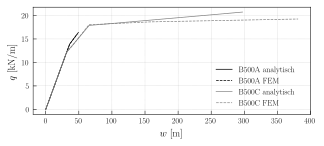

In [109]:
fig_q_w, ax_q_w = plt.subplots(figsize=(14/2.54,5.4/2.54))


ax_q_w.plot(w_A_array, q_A_array, color='black', label='B500A analytisch')
# ax_q_w.plot(w_A_FEM_array, q_A_array, color='black', linestyle='dashed', label='B500A FEM')
ax_q_w.plot(DF_b500a_res['eZ_1 [mm]'], DF_b500a_res['Lpa'], color='black', linestyle='dashed', label='B500A FEM')
ax_q_w.plot(w_C_array, q_C_array, color='gray', label='B500C analytisch')
# ax_q_w.plot(w_C_FEM_array, q_C_FEM_array, color='gray', linestyle='dashed', label='B500C FEM')
ax_q_w.plot(DF_b500c_res['eZ_1 [mm]'], DF_b500c_res['Lpa'], color='gray', linestyle='dashed', label='B500C FEM')

# Add labels and show the plot
ax_q_w.set_ylabel("$q$ [kN/m]")
ax_q_w.set_xlabel("$w$ [m]")

plt.legend()
# Save the plot to the specified file
plt.savefig("imgs/jag_q_w.svg")
# plt.close()

![Last-Feldmittendurchbiegung-Diagramm für beide Betonstähle, analytisch gelöst und mit der FEM-Lösung nachgerechnet](../imgs/jag_q_w.svg){#fig-jag_q_w}